In [1]:
from monai.apps import DecathlonDataset
import nibabel as nib
from pathlib import Path
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
module_path = str(Path.cwd().parents[0] / "data")
training_data = DecathlonDataset(root_dir=module_path, task="Task01_BrainTumour", section="training", 
    download=True, cache_num=0, num_workers=3)

2023-04-18 15:35:48,051 - INFO - Verified 'Task01_BrainTumour.tar', md5: 240a19d752f0d9e9101544901065d872.
2023-04-18 15:35:48,052 - INFO - File exists: c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task01_BrainTumour.tar, skipped downloading.
2023-04-18 15:35:48,053 - INFO - Non-empty folder exists in c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task01_BrainTumour, skipped extracting.


In [3]:
df = pd.DataFrame(training_data.data)
df.shape

(388, 2)

In [4]:
df.head()

,image,label
0,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...
1,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...
2,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...
3,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...
4,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\c...


In [5]:
imgage = nib.load(df.image[0]).get_fdata()
mask = nib.load(df.label[0]).get_fdata()
print(imgage.shape, mask.shape)
print(imgage.dtype, mask.dtype)
imgage = imgage.astype(np.uint8)
mask = mask.astype(np.uint8)
print(imgage.shape, mask.shape)
print(imgage.dtype, mask.dtype)

(240, 240, 155, 4) (240, 240, 155)
float64 float64
(240, 240, 155, 4) (240, 240, 155)
uint8 uint8


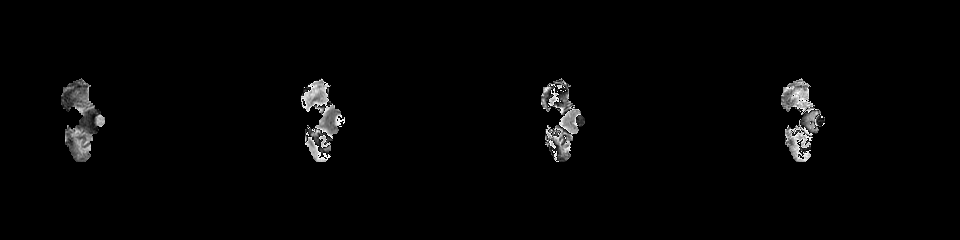

In [6]:
Image.fromarray(np.concatenate((imgage[:, :, 0, 0], imgage[:, :, 0, 1], imgage[:, :, 0, 2], imgage[:, :, 0, 3]), axis=1))

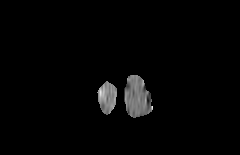

In [7]:
Image.fromarray(np.rot90(np.rot90(imgage, axes=(1,2)),axes=(1,0))[:, :, 30, 0])

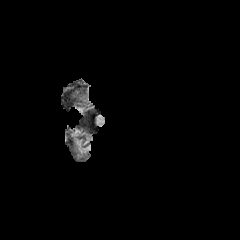

In [8]:
Image.fromarray(imgage[:, :, 0, 0])

In [9]:
np.unique(mask)

array([0, 1, 2, 3], dtype=uint8)

In [10]:
np.sum(mask[:,:,75:76])

4730

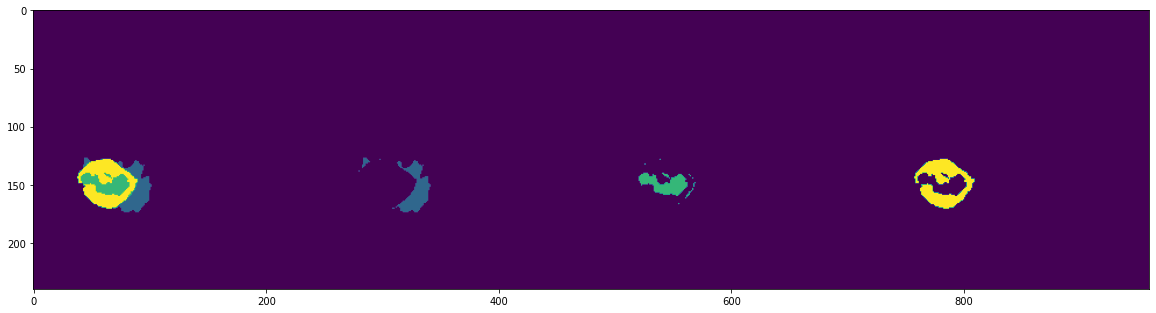

In [11]:
concatinated = np.concatenate((
    mask[:,:,75],
    np.reshape([x if x == 1 else 0 for x in mask[:,:,75].flatten()], (240,240)),
    np.reshape([x if x == 2 else 0 for x in mask[:,:,75].flatten()], (240,240)),
    np.reshape([x if x == 3 else 0 for x in mask[:,:,75].flatten()], (240,240))),
                axis=1)
plt.figure(figsize=(20,10))
plt.imshow(concatinated)

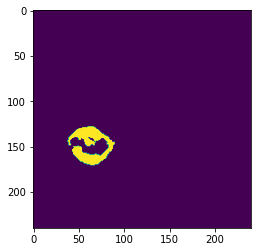

In [12]:
plt.imshow(np.reshape([x if x == 3 else 0 for x in mask[:,:,75].flatten()], (240,240)))

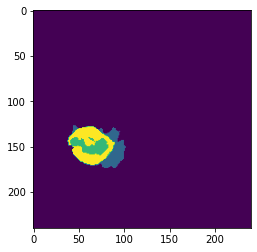

In [13]:
plt.imshow(mask[:,:,75])

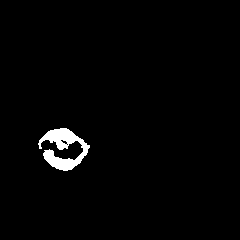

In [14]:
Image.fromarray(np.uint8(np.reshape([255 if x == 3 else 0 for x in mask[:,:,75].flatten()], (240,240))))

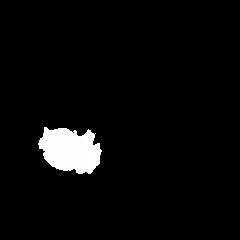

In [15]:
Image.fromarray(np.uint8(mask[:,:,75])*255)

In [16]:
#Plots all different layers in image side by side
def sideBySidePlot(imgage):
    imgage = np.flip(np.rot90(imgage,axes=(1,0)), axis=1)
    mng = np.concatenate(([imgage[:,:,:,x] for x in range(imgage.shape[3])]), axis=1)
    frames = [Image.fromarray(mng[:, :, (mng.shape[2]-i-1)]) for i in range(mng.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/brain/BrainTumour.gif", format="GIF", append_images=frames,
               save_all=True, duration=0.01, loop=0)
sideBySidePlot(imgage)

In [17]:
#plots single image layer side by side with combined mask
def maskPlot(mask, image):
    image = np.flip(np.rot90(image,axes=(1,0)), axis=1)
    image = image[:,:,:,0]

    mask = np.flip(np.rot90(mask,axes=(1,0)), axis=1)
    mask = np.uint8(mask)*255
    
    combined = np.concatenate((image, mask), axis=1)
    frames = [Image.fromarray(combined[:, :, (combined.shape[2]-i-1)]) for i in range(combined.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/brain/BrainTumourMask.gif", format="GIF", append_images=frames,
               save_all=True, duration=0.01, loop=0)
maskPlot(mask, imgage)

In [18]:
#plots all image layers with all + combined mask layer()
def multiMaskPlot(mask, image):
    image = np.flip(np.rot90(image,axes=(1,0)), axis=1)
    image = np.concatenate((image[:, :, :, 0], image[:, :, :, 1], image[:, :, :, 2], image[:, :, :, 3]), axis=1)

    mask = np.flip(np.rot90(mask,axes=(1,0)), axis=1)
    concat_arrays = [
        mask,
        np.where(mask == 1, 1, 0),
        np.where(mask == 2, 2, 0),
        np.where(mask == 3, 3, 0)
    ]
    concatinated = np.concatenate(concat_arrays, axis=1)
    concatinated = np.uint8(concatinated)*255
    combined = np.concatenate((image,concatinated) , axis=0)
    frames = [Image.fromarray(combined[:, :, (combined.shape[2]-i-1)]) for i in range(combined.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/brain/MultiBrainTumourMask.gif", format="GIF", append_images=frames,
               save_all=True, duration=0.01, loop=0)
multiMaskPlot(mask, imgage)

In [19]:
#function to rotate brain facing left to face head on
def getFrontal(imgage):
    return np.flip(np.rot90(np.rot90(imgage, axes=(1,2)), k=3,axes=(1,0)))

In [20]:
#plots frontal image layers side by side
def frontal(imgage):
    mng = np.flip(getFrontal(imgage), axis=1)
    combined = np.concatenate(([mng[:,:,:,x] for x in reversed(range(mng.shape[3]))]), axis=1)

    frames = [Image.fromarray(combined[:, :, i]) for i in range(combined.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/brain/Frontal.gif", format="GIF", append_images=frames,
               save_all=True, duration=0.01, loop=0)
frontal(imgage)

In [21]:
#plots frontal mask layers side by side
def frontalMask(mask):
    mask = np.flip(getFrontal(mask), axis=1)
    concat_arrays = [
        mask,
        np.where(mask == 1, 1, 0),
        np.where(mask == 2, 2, 0),
        np.where(mask == 3, 3, 0)
    ]
    concatinated = np.concatenate(concat_arrays, axis=1)
    concatinated = np.uint8(concatinated) * 255
    frames = [Image.fromarray(concatinated[:, :, i]) for i in range(concatinated.shape[2])]
    frames[0].save("images/brain/FrontalMask.gif", format="GIF", append_images=frames[1:],
                   save_all=True, duration=0.01, loop=0)
frontalMask(mask)

In [22]:
#plots frontal image and mask
def combinedFront(imgage, mask):
    imgage = np.flip(getFrontal(imgage), axis=1)
    mask = np.flip(getFrontal(mask), axis=1)
    imgage = np.concatenate([imgage[:, :, :, x] for x in reversed(range(imgage.shape[3]))], axis=1)

    concat_arrays = [
        mask,
        np.where(mask == 1, 1, 0),
        np.where(mask == 2, 2, 0),
        np.where(mask == 3, 3, 0)
    ]
    concatinated = np.concatenate(concat_arrays, axis=1)
    concatinated = np.uint8(concatinated) * 255

    combined = np.concatenate((imgage, concatinated), axis=0)

    frames = [Image.fromarray(combined[:, :, i]) for i in range(combined.shape[2])]
    frames[0].save("images/brain/FrontalMaskCombined.gif", format="GIF", append_images=frames[1:],
                   save_all=True, duration=0.01, loop=0)
combinedFront(imgage, mask)    

In [23]:
#plots everything in a massive image:)
def everythingCombined(imgage, mask):
    #========== Frontal
    frontImgage = np.flip(getFrontal(imgage), axis=1)
    frontMask = np.flip(getFrontal(mask), axis=1)
    frontImgage = np.concatenate(([frontImgage[:,:,:,x] for x in reversed(range(frontImgage.shape[3]))]), axis=1)


    concat_arrays = [
            frontMask,
            np.where(frontMask == 1, 1, 0),
            np.where(frontMask == 2, 2, 0),
            np.where(frontMask == 3, 3, 0)
        ]
    concatenated = np.concatenate(concat_arrays, axis=1)
    concatenated = np.uint8(concatenated)*255

    frontal = np.concatenate((frontImgage, concatenated), axis=0)
    #============

    image = np.flip(np.rot90(imgage, axes=(1, 0)), axis=1)
    image = np.concatenate(([image[:,:,:,x] for x in range(image.shape[3])]), axis=1)

    maskk = np.flip(np.rot90(mask, axes=(1, 0)), axis=1)
    concat_arrays = [
            maskk,
            np.where(maskk == 1, 1, 0),
            np.where(maskk == 2, 2, 0),
            np.where(maskk == 3, 3, 0)
        ]
    concatenated = np.concatenate(concat_arrays, axis=1)
    concatenated = np.pad(np.uint8(concatenated)*255, ((85,85), (0,0), (0,0)))
    combined = np.pad(np.concatenate((image, concatenated), axis=0), ((0,0), (0,0), (42,43)))

    print(frontal.shape, combined.shape)

    x = np.concatenate((combined[:,:,::-1], frontal), axis=0)

    frames = [Image.fromarray(x[:, :, i]) for i in range(x.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/brain/EverythingCombined.gif", format="GIF", append_images=frames,
                save_all=True, duration=0.01, loop=0)
everythingCombined(imgage, mask)

(310, 960, 240) (650, 960, 240)
